# Model Building

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 100)

### Import data

In [6]:
squat_data = pd.read_csv('/Users/andrew/OneDrive - Williams College/Data Science Projects/Independent/powerlifting/mice_imputed_squat_data.csv')
bench_data = pd.read_csv('/Users/andrew/OneDrive - Williams College/Data Science Projects/Independent/powerlifting/mice_imputed_bench_data.csv')
deadlift_data = pd.read_csv('/Users/andrew/OneDrive - Williams College/Data Science Projects/Independent/powerlifting/mice_imputed_deadlift_data.csv')

# Put into a single data structure
dfs = {'squat':squat_data, 'bench':bench_data, 'dl':deadlift_data}

print(dfs['squat'].columns)

Index(['rank', 'age', 'weight', 'squat', 'bench', 'dl', 'total', 'dots',
       'squat_avg_avg', 'squat_avg_std', 'second_best_sq',
       'squat_avg_rate_change', 'bench_avg_avg', 'bench_avg_std',
       'second_best_bn', 'bench_avg_rate_change', 'dl_avg_avg', 'dl_avg_std',
       'second_best_dl', 'dl_avg_rate_change', 'previous_comp_count',
       'num_bests', 'num_days', 'federation_enc_cb', 'date_enc_cb',
       'location_enc_cb', 'sex_enc_cb', 'equip_enc_cb', 'class_enc_cb',
       'month_enc_cb', 'year_enc_cb', 'season_enc_cb', 'country_enc_cb',
       'state_enc_cb', 'federation', 'date', 'location', 'sex', 'equip',
       'class', 'month', 'year', 'season', 'country', 'state'],
      dtype='object')


### Drop variables and train, test, split

In [7]:
# Reasons for dropping:
# Rank is not useful because it is unique for each row. Total and dots are calculated from the dependent variables. 
# The rest are string variables that have already been CatBoost encoded
drop_cols = ['rank','total','dots','federation','date','location','sex','equip','class','month','year','season',
             'country','state']
X_sq = dfs['squat'].drop(columns=drop_cols + ['squat'])
X_bn = dfs['bench'].drop(columns=drop_cols + ['bench'])
X_dl = dfs['dl'].drop(columns=drop_cols + ['dl'])

y_sq = dfs['squat']['squat'].values
y_bn = dfs['bench']['bench'].values
y_dl = dfs['dl']['dl'].values

from sklearn.model_selection import train_test_split
X_train_sq, X_test_sq, y_train_sq, y_test_sq = train_test_split(X_sq, y_sq, test_size=0.2, random_state=42)
tts_sq = train_test_split(X_sq, y_sq, test_size=0.2, random_state=42)
tts_bn = train_test_split(X_bn, y_bn, test_size=0.2, random_state=42)
tts_dl = train_test_split(X_dl, y_dl, test_size=0.2, random_state=42)

### Train models, create plots, get evaluation metrics

squat


,Coefficient
bench_avg_avg,-0.516435
bench_avg_std,-0.316212
age,-0.288832
season_enc_cb,-0.226764
dl_avg_avg,-0.191251
month_enc_cb,-0.171719
second_best_dl,-0.131571
year_enc_cb,-0.123984
squat_avg_rate_change,-0.096639
country_enc_cb,-0.087490


Multiple Regression Metrics for squat
MAE: 24.138359858240992
MSE: 1137.9876081314515
RMSE: 33.734071917446485


,Coefficient
bench_avg_avg,-0.510686
bench_avg_std,-0.308831
age,-0.264181
dl_avg_avg,-0.189135
month_enc_cb,-0.169661
season_enc_cb,-0.133704
second_best_dl,-0.132628
year_enc_cb,-0.118309
squat_avg_rate_change,-0.094684
country_enc_cb,-0.082396


Lasso Regression Metrics for squat
MAE: 24.132203373834322
MSE: 1137.7771074037664
RMSE: 33.73095177138894

No coefficients associated with this algorithm

Random Forest Regressor Metrics for squat
MAE: 22.939464260929903
MSE: 1086.1802607855655
RMSE: 32.95724898691584


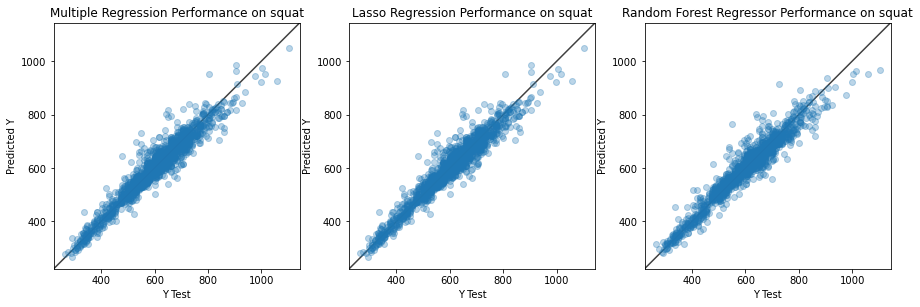

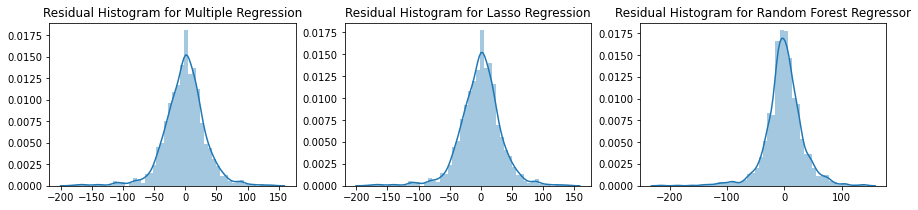

-------------------------------------------------------------------------------------------------------
bench


,Coefficient
squat_avg_avg,-0.287086
dl_avg_avg,-0.246943
equip_enc_cb,-0.237027
bench_avg_rate_change,-0.188564
location_enc_cb,-0.145079
squat_avg_std,-0.137964
second_best_bn,-0.099084
dl_avg_std,-0.081762
age,-0.073533
month_enc_cb,-0.037637


Multiple Regression Metrics for bench
MAE: 16.766856021946225
MSE: 555.3290007104094
RMSE: 23.565419595466775


,Coefficient
squat_avg_avg,-0.282467
dl_avg_avg,-0.234924
equip_enc_cb,-0.230297
bench_avg_rate_change,-0.184000
squat_avg_std,-0.132732
second_best_bn,-0.084402
location_enc_cb,-0.082856
dl_avg_std,-0.070120
age,-0.048497
second_best_sq,-0.020119


Lasso Regression Metrics for bench
MAE: 16.78293772678025
MSE: 555.3560856841356
RMSE: 23.565994264705566

No coefficients associated with this algorithm

Random Forest Regressor Metrics for bench
MAE: 15.550787647467018
MSE: 491.998007791117
RMSE: 22.18102810491698


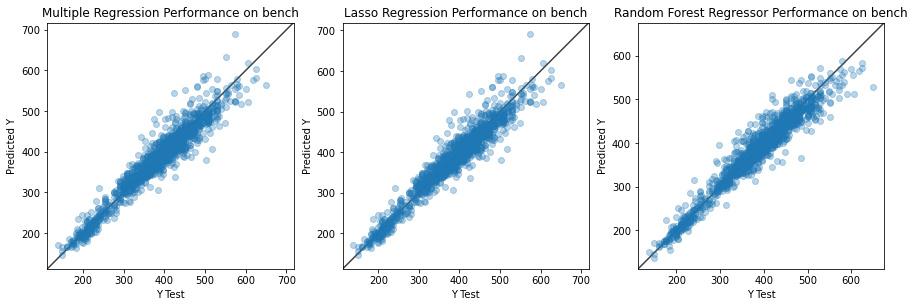

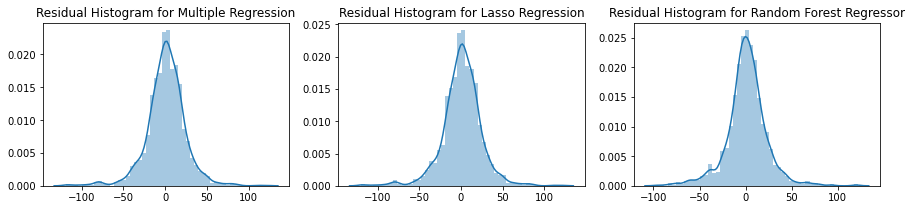

-------------------------------------------------------------------------------------------------------
deadlift


,Coefficient
equip_enc_cb,-0.368849
age,-0.214407
bench_avg_avg,-0.199792
squat_avg_avg,-0.132865
previous_comp_count,-0.101754
season_enc_cb,-0.099647
state_enc_cb,-0.081095
squat_avg_std,-0.067982
second_best_sq,-0.064022
bench_avg_std,-0.062972


Multiple Regression Metrics for deadlift
MAE: 16.44298104757623
MSE: 508.66928857944436
RMSE: 22.55369789146437


,Coefficient
equip_enc_cb,-0.344162
age,-0.192012
bench_avg_avg,-0.183241
squat_avg_avg,-0.135905
previous_comp_count,-0.090360
squat_avg_std,-0.069031
second_best_sq,-0.062168
bench_avg_std,-0.046107
state_enc_cb,-0.021733
dl_avg_rate_change,-0.020356


Lasso Regression Metrics for deadlift
MAE: 16.466482197260575
MSE: 510.10149427584133
RMSE: 22.585426590521628

No coefficients associated with this algorithm

Random Forest Regressor Metrics for deadlift
MAE: 16.646238723108947
MSE: 505.8982460943791
RMSE: 22.49218188825573


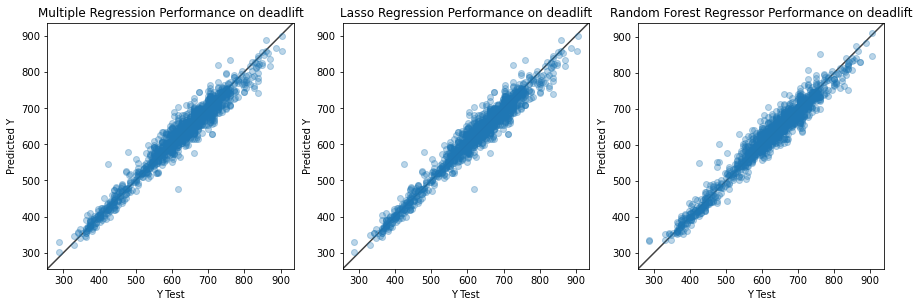

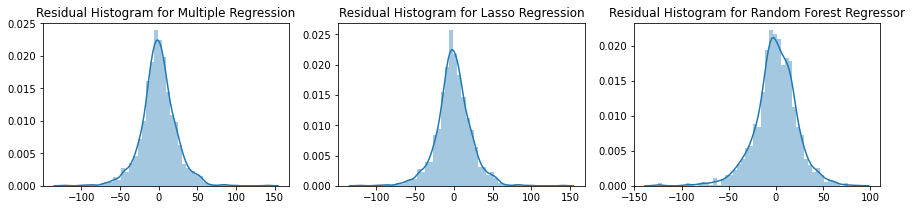

-------------------------------------------------------------------------------------------------------


In [8]:
# Import all models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
import pickle

for (X_train, X_test, y_train, y_test), name in ((tts_sq, 'squat'), (tts_bn, 'bench'), (tts_dl, 'deadlift')):
    print(name)
    
    # Multiple linear regression
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    predictions_lm = lm.predict(X_test)
    
    # Lasso
    lasso = Lasso()
    lasso.fit(X_train, y_train)
    predictions_ls = lasso.predict(X_test)
    
    # Random forest regressor
    forest = RandomForestRegressor()
    forest.fit(X_train, y_train)
    predictions_rf = forest.predict(X_test)
    
    # All of the stuff
    all_algorithms = ['Multiple Regression', 'Lasso Regression', 'Random Forest Regressor']
    all_models = [lm, lasso, forest]
    all_predictions = [predictions_lm, predictions_ls, predictions_rf]
    
    # Straighter line --> higher accuraacy
    fig, axes = plt.subplots(ncols=3, figsize=(15,6))
    fig2, axes2 = plt.subplots(ncols=3, figsize=(15,3))
    
    # Build plot, dataframe, and metrics for each model
    for ax, ax2, algorithm, model, predictions in zip(axes, axes2, all_algorithms, all_models, all_predictions):
        ax.set_xlabel('Y Test')
        ax.set_ylabel('Predicted Y')
        ax.scatter(y_test, predictions, alpha=0.3)
        ax.title.set_text(algorithm + ' Performance on ' + name)
        lims = [
            np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()])   # max of both axes
        ]
        
        sns.distplot((y_test-predictions), bins=50, ax=ax2)
        ax2.title.set_text('Residual Histogram for ' + algorithm)

        # now plot both limits against each other
        ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
        ax.set_aspect('equal')
        ax.set_xlim(lims)
        ax.set_ylim(lims)
        
        # Dataframe of coefficients
        try: 
            all_cols = X_sq.columns # X_sq columns are same as X_bn and X_dl
            coeffecients = pd.DataFrame(model.coef_, all_cols)
            coeffecients.columns = ['Coefficient']
            display(coeffecients.sort_values('Coefficient'))
        except:
            print('\nNo coefficients associated with this algorithm\n')
        
        # Evaluation metrics
        print(algorithm + ' Metrics for ' + name)
        print('MAE:', metrics.mean_absolute_error(y_test, predictions))
        print('MSE:', metrics.mean_squared_error(y_test, predictions))
        print('RMSE:', metrics.mean_squared_error(y_test, predictions, squared=False))
    
    plt.show()
    print('-------------------------------------------------------------------------------------------------------')
    
    # Productionize
    path = '/Users/andrew/OneDrive - Williams College/Data Science Projects/Independent/powerlifting/webapp/model/'
    pickl = {'model': forest}
    pickle.dump( pickl, open( path + 'model_file_' + name + ".pkl", "wb" ) )
    